<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---



In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import io, measure, exposure
from skimage.color import rgba2rgb, rgb2gray
from skimage.feature import greycomatrix, greycoprops

from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import os
import csv
import random

%matplotlib inline

### Step 1: load the csv file that contain the generated features 

In [48]:
features = []
labels = []

with open('border.csv', newline='') as csvfile:
    stored_features = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in stored_features:
        filename = row[0]
        class_label = row[1]
        v = np.array(row[2:len(row)], dtype=np.float32)
        f = [filename, class_label, v]
        features.append(f)
        labels.append(class_label)

In [49]:
with open('Center.csv', newline='') as csvfile:
    stored_features = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in stored_features:
        filename = row[0]
        class_label = row[1]
        v = np.array(row[2:len(row)], dtype=np.float32)
        f = [filename, class_label, v]
        features.append(f)
        labels.append(class_label)

In [50]:
with open('Blank.csv', newline='') as csvfile:
    stored_features = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in stored_features:
        filename = row[0]
        class_label = row[1]
        v = np.array(row[2:len(row)], dtype=np.float32)
        f = [filename, class_label, v]
        features.append(f)
        labels.append(class_label)


### Step 2: Split the data into training and testing

In [51]:
feature_length = len(features[0][2])
features, labels = shuffle(features, labels, random_state=0)

In [52]:
N_train = 60
features_train = features[0:N_train]
features_test = features[N_train:len(features)]

labels_train = labels[0:N_train]
labels_test = labels[N_train:len(features)]

In [53]:
data_train = np.zeros((len(features_train), feature_length))
data_test  = np.zeros((len(features_test), feature_length))

In [54]:
for i in range(0, len(features_train)):
    data_train[i, :] = features_train[i][2]
    
for i in range(0, len(features_test)):
    data_test[i, :] = features_test[i][2]

### Step 3: Set up the classifier and train it

In [55]:
clf = SVC(random_state=0, max_iter=500,kernel = "rbf")
#"linear","poly","rbf","sigmoid"

In [56]:
clf.fit(data_train, np.asarray(labels_train))

SVC(max_iter=500, random_state=0)

In [57]:
prediction = clf.predict(data_test)

In [58]:
print(classification_report(labels_test, prediction))

              precision    recall  f1-score   support

           0       0.46      0.26      0.33       481
           1       0.00      0.00      0.00       486
           2       0.40      0.98      0.56       472

    accuracy                           0.41      1439
   macro avg       0.29      0.41      0.30      1439
weighted avg       0.28      0.41      0.30      1439



/Users/perciva1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(classification_report(labels_test,prediction))
print("train_dataset：", clf.score(data_train, labels_train))
print("test_dataset：", clf.score(data_test, labels_test))
confusion_matrix = confusion_matrix(labels_test,prediction)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.46      0.26      0.33       481
           1       0.00      0.00      0.00       486
           2       0.40      0.98      0.56       472

    accuracy                           0.41      1439
   macro avg       0.29      0.41      0.30      1439
weighted avg       0.28      0.41      0.30      1439

train_dataset： 0.55
test_dataset： 0.4086170952050035
[[126   0 355]
 [137   0 349]
 [ 10   0 462]]


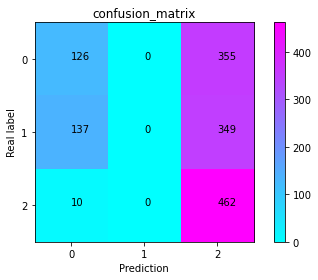

In [60]:
classes = ['0','1','2']
confusion_matrix = np.array(confusion_matrix,dtype=int)

plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.cool)  
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = confusion_matrix.max() / 2.

iters = np.reshape([[[i,j] for j in range(3)] for i in range(3)],(confusion_matrix.size,2))
for i, j in iters:
    plt.text(j, i, format(confusion_matrix[i, j])) 

plt.ylim(len(confusion_matrix) - 0.5,-0.5)
plt.ylabel('Real label')
plt.xlabel('Prediction')
plt.tight_layout()
plt.show()